In [1]:
%matplotlib inline
import random

In [2]:
num_iterations = 10000
rand_range = (-5, 5)

In [3]:
def generator() -> int:
    return random.randrange(rand_range[0], rand_range[1]+1)

In [4]:
X = [0]
for t in range (1, num_iterations):
    X.append(generator())

In [5]:
import csv
from datetime import datetime
with open(f'../datasets/wn_{datetime.utcnow()}.csv', 'w', newline='') as csvfile:
    ds_writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    ds_writer.writerow(X)

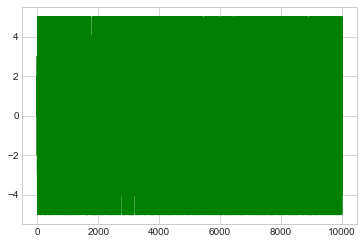

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(X, color = "green")
plt.show()

In [7]:
import numpy as np
ts = np.array(X)

In [8]:
ts.mean()

0.0111

In [9]:
ts.std()

3.15324860897456

In [10]:
from math import ceil, floor
def DDF(series):
    return np.histogram(series, bins=int(ceil(max(series))-floor(min(series))), density=True)    

def E(series):
    x, p = DDF(series)
    return sum([x[i] * p[i] for i in range(len(x))])

def Var(series): 
    p, x = DDF(series)
    u = E(series)
    return sum([p[i] * ((x[i] - u)**2) for i in range(len(p))])

In [11]:
mu = E(X)
sigma = Var(X)
print (f"mu = {mu} sigma={sigma}")

mu = -0.07899999999999996 sigma=9.125959


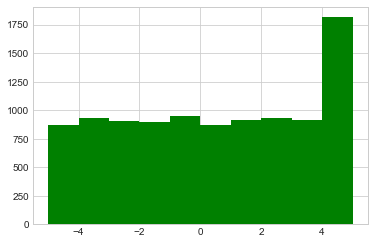

In [12]:
count, bins, ignored  = plt.hist(X, max(X)-min(X), color='green')